In [102]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


from sklearn.datasets import load_digits
import numpy as np

import tqdm

In [90]:
data = load_digits()

X = data["data"]
y = data["target"]

X = X.reshape(len(X), np.prod(X.shape[1:]))

X = torch.Tensor(X)
y = torch.LongTensor(y)

X.shape, y.shape

(torch.Size([1797, 64]), torch.Size([1797]))

In [91]:
from matplotlib.pyplot import imshow

(<matplotlib.image.AxesImage at 0x243ed474e08>, tensor(1))

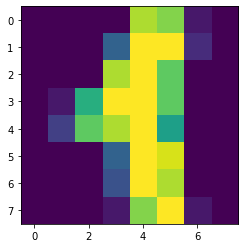

In [92]:
imshow(X[11].reshape(8, 8)), y[11]

In [93]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.l1 = nn.Linear(64, 32)
        self.l2 = nn.Linear(32, 16)
        self.l3 = nn.Linear(16, 10)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        return x 

In [94]:
net = Net()

In [95]:
pred = np.argmax(net.forward(X[2]).detach().numpy()) # Pred before training
pred

7

In [125]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
for i in (range(1000)): # 10 epochs
    optimizer.zero_grad()
    output = net(X)
    loss = F.cross_entropy(output, y)
    loss.backward()
    optimizer.step()

    print(output[0])
    break


AxisError: axis 2 is out of bounds for array of dimension 2

2